In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv', 'data_description.txt']


First we read the train and test data into dataframes using pandas and take a quick peek at whe size and variables.

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

print('dimensions of train data set')
print(train.shape)
print('information of test data set')
print(test.shape)

print(train.head())

test.head()

#print(train.dtypes[train.dtypes == 'int64'])






print(LabelEncoder().fit_transform(train.SaleCondition))


print(test.dtypes)


dimensions of train data set
(1460, 81)
information of test data set
(1459, 80)
   Id  MSSubClass MSZoning    ...     SaleType  SaleCondition SalePrice
0   1          60       RL    ...           WD         Normal    208500
1   2          20       RL    ...           WD         Normal    181500
2   3          60       RL    ...           WD         Normal    223500
3   4          70       RL    ...           WD        Abnorml    140000
4   5          60       RL    ...           WD         Normal    250000

[5 rows x 81 columns]
[4 4 4 ... 4 4 4]
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int

Note that the test data is missing the SalePrice. Our goal in this kernel is to apply regression for the variable SalePrice. Most of our variables are not numeric. Now let's look at a correlation table for the test dataframe using seaborn.

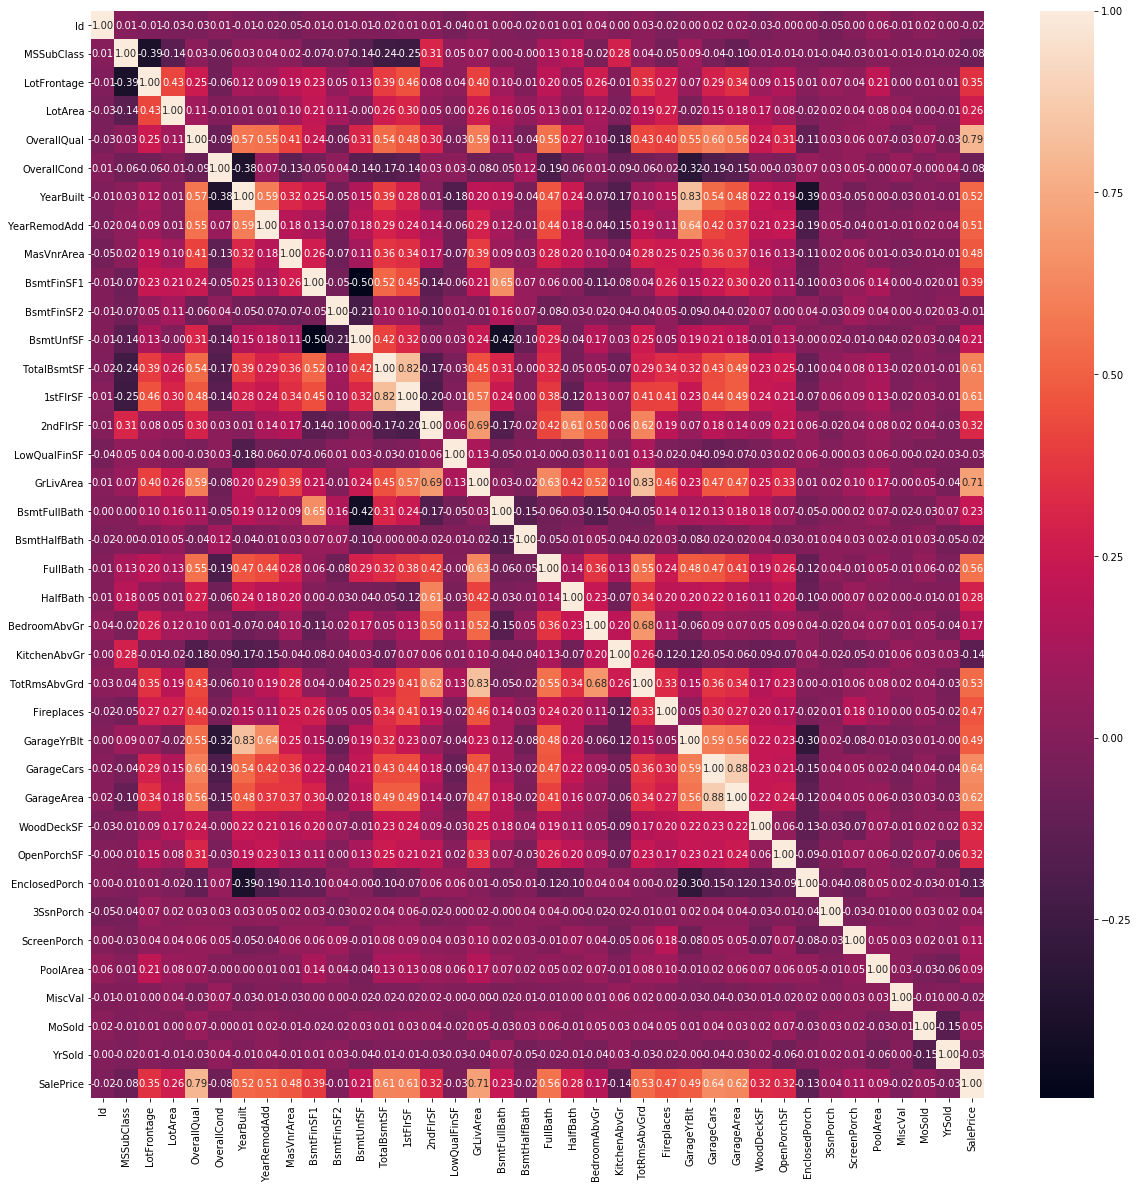

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(train.corr(), annot = True, fmt = '.2f')
plt.show()

At a quick glance we see that most features are not correlated except for a few: (SalePrice, OverallQual), (GarageYrBlt, YearBuilt), (1stFlrSF, TotalBmstSF), and (GarageArea, GarageCars) to mention a few pairs. So there won't be many features we drop from our training data. 

Now let's look at how many NA columns we have.

In [4]:
print(train.columns)
test.columns

train_nainfo = train.isna().sum()
test_nainfo = test.isna().sum()


print('missing values for train \n', train_nainfo[train_nainfo > 0])
print('missing values for test \n', test_nainfo[test_nainfo > 0])

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Let us remind the reader that we have 1460 rows in our train data set as well as in our test data. Here we find quite a few variables that are missing more than 40 percent of their entries in both train and test dataframes. These include Alley, FireplaceQu, PoolQC, MiscFeature. We drop all of these columns from both dataframes.

In [5]:
columns_todrop = ['Alley', 'FireplaceQu', 'PoolQC', 'MiscFeature']

train1 = train.drop(columns_todrop, axis = 1)
test1 = test.drop(columns_todrop, axis = 1)







Now let's convert all categorical variables into numerical variables using 

In [6]:
def toDummies(columns, dataframe):
    for column in columns:
        dataframe[column] = LabelEncoder().fit_transform(dataframe[column].astype(str))
    return dataframe
    

We find all data types that are not numerical and use the helper function above to turn these categorical variables into numeric.

In [7]:
columns = list(train1.dtypes[train1.dtypes == np.object].keys())
print(columns)

#columns = ['MSZoning', 'Street']

t1 = toDummies(columns, train1 )
t2 = toDummies(columns, test1)

t1.head()
t2.head()

print('here', t1['LotFrontage'].isna().sum())

print(t1.dtypes[t1.dtypes == np.float64])

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']
here 259
LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object


Now let's create another helper function to replace all missing values with the median in each column.

In [8]:
def fill_med(dataframe):
    for column in dataframe.columns:
        if dataframe[column].isna().sum != 0:
            dataframe[column] = dataframe[column].transform(lambda x: x.fillna(x.median()))
    return dataframe

In [9]:
t11 = fill_med(t1)
t22 = fill_med(t2)

t11.head()

final = t22

final2 = t22
#print(t11.isna().sum())
#print(t22.isna().sum())

#print(t11.columns)
#print(t22.columns)


Let's fit a model and predict some values!

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_log_error, mean_squared_error 
#do some cross validation

X_train, X_test, y_train, y_test = train_test_split(t11.drop(['SalePrice'], axis = 1),
                                                    t11['SalePrice'])

ranfor = RandomForestClassifier(n_estimators = 100, max_depth = 15, min_samples_leaf = 2, 
                               random_state = 40)
ranfor.fit(X_train, y_train)

pred_train = ranfor.predict(X_train)
pred_test = ranfor.predict(X_test)

print("msle for train is: ", mean_squared_log_error(y_train, pred_train))
print("msle for validation is: ", mean_squared_log_error(y_test, pred_test))

print("mean squared error for train is: ", mean_squared_error(y_train, pred_train))
print("mean squared error for validation is: ", mean_squared_error(y_train, pred_train))


#ranfor1 = RandomForestClassifier(n_estimators = 100, max_depth = 15, min_samples_leaf = 2,
#                                random_state = 7)
#ranfor1.fit(t11.drop(['SalePrice'], axis = 1), t11['SalePrice'])


#final['SalePrice'] = ranfor.predict(t22)

#csv = final[['Id', 'SalePrice']]

#csv.to_csv('first_prediction', index = False)

#csv.info()




msle for train is:  3.603032150077412e-05
msle for validation is:  0.03950141042574991
mean squared error for train is:  1804726.6675799086
mean squared error for validation is:  1804726.6675799086


Let's write a helper function to calculate msle values for each model we fit. Also, we write a helper function to calculate cross validation scores for bagged and boosted trees.

In [11]:
from sklearn import model_selection


def calculateScore(true, pred):
    return mean_squared_log_error(true, pred)

def meanScore(model, X, y, seed, n_splits):
    kfold = model_selection.KFold(n_splits = n_splits, random_state = 7)
    return model_selection.cross_val_score(model, X, y, cv = kfold, 
                                           scoring = 'neg_mean_squared_log_error' ).mean()

Let's compute the mean score for bagged trees.

In [12]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

num_trees = 10
seed = 7
split = 10

model1 = BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = num_trees,
                         random_state = seed)
model2 = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)


print('train')
print(meanScore(model1, X_train, y_train, seed, split)) 
print(meanScore(model2, X_train, y_train, seed, split))

print('test')
print(meanScore(model1, X_test, y_test, seed, split)) 
print(meanScore(model2, X_test, y_test, seed, split))





train
-0.12795991695094225
-0.11700103830613415
test
-0.158376950938456
-0.16763435517910574


Boosted trees perform slightly better. Let's fit our data to this model and generate some predictions!

In [13]:
boostedTrees = AdaBoostClassifier(n_estimators = 50, random_state = 7)

boostedTrees.fit(X_train, y_train)

pred_train = boostedTrees.predict(X_train)
pred_test = boostedTrees.predict(X_test)

print("msle for train is: ", mean_squared_log_error(y_train, pred_train))
print("msle for validation is: ", mean_squared_log_error(y_test, pred_test))





msle for train is:  0.11874589876294322
msle for validation is:  0.12038618423759707


Next, we will look at gradient boosting classifiers and improve our model by adjusting learning rates.

Now let's look at Ridge Regression.

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha_values = [0, 0.001, 0.01, 0.1, 1]
grid = GridSearchCV(estimator = Ridge(), param_grid = dict(alpha = alpha_values))

grid.fit(t11.drop(['SalePrice'], axis = 1), t11['SalePrice'])

print(grid.best_score_)
print(grid.best_estimator_.alpha)

final2['SalePrice'] = grid.predict(t22)

csv = final2[['Id', 'SalePrice']]

csv.to_csv('first_prediction', index = False)

csv.info()


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.083000e-19
  overwrite_a=True).T
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8088154498269432
0.001
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null int64
SalePrice    1459 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
